In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’




In [3]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [7]:
info   <- read.table("ALL.info", header=TRUE, row.names=1, sep = ",")



In [8]:
counts <- as.matrix(read.table("ALL.counts", header=TRUE, row.names=1, sep = ","))



In [9]:
info

,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


In [10]:
counts

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3466,3532,4078,4507,3964,5757
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,152,137,152,348,275,472
ENSMUSG00000000031.16,55721,48392,56187,64722,33333,65188
ENSMUSG00000000037.17,43,44,53,79,70,92
ENSMUSG00000000049.11,10,8,11,4,1,1
ENSMUSG00000000056.7,730,706,679,650,439,716
ENSMUSG00000000058.6,1465,1439,1812,1022,1003,1196
ENSMUSG00000000078.7,5197,5432,5567,4513,3271,5056
ENSMUSG00000000085.16,804,732,657,700,440,780


In [11]:
dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [12]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



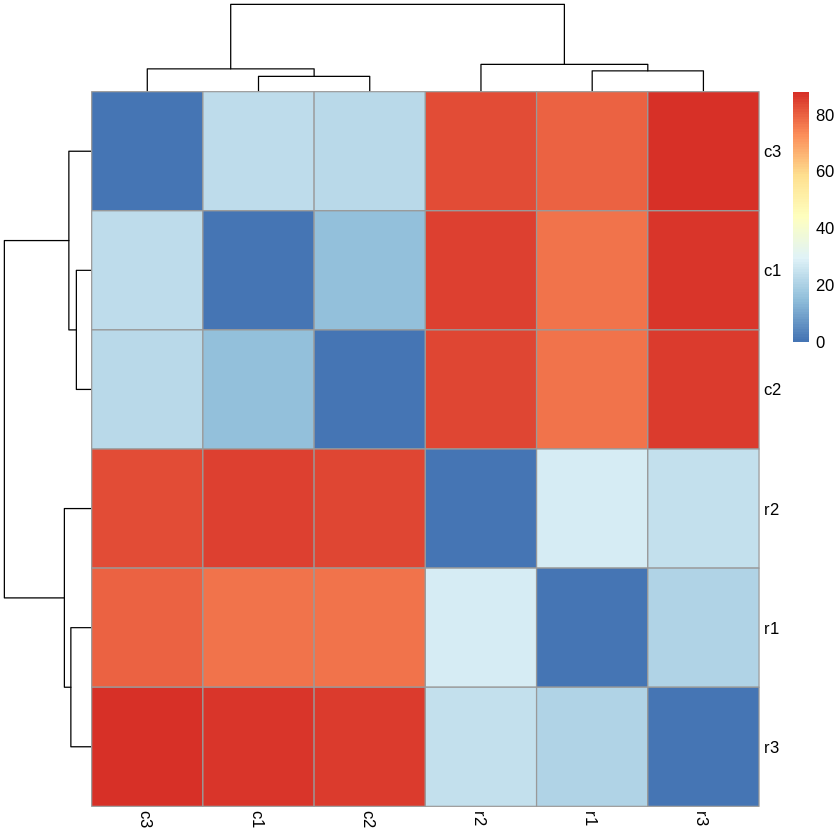

In [13]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)


In [14]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

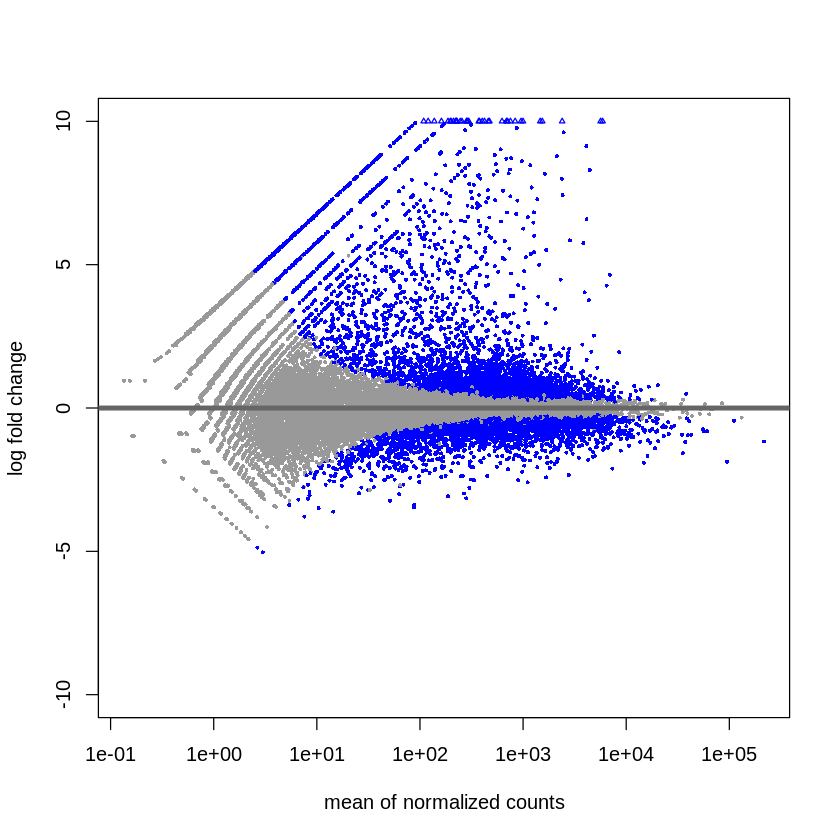

In [15]:
plotMA(res, ylim=c(-10,10))

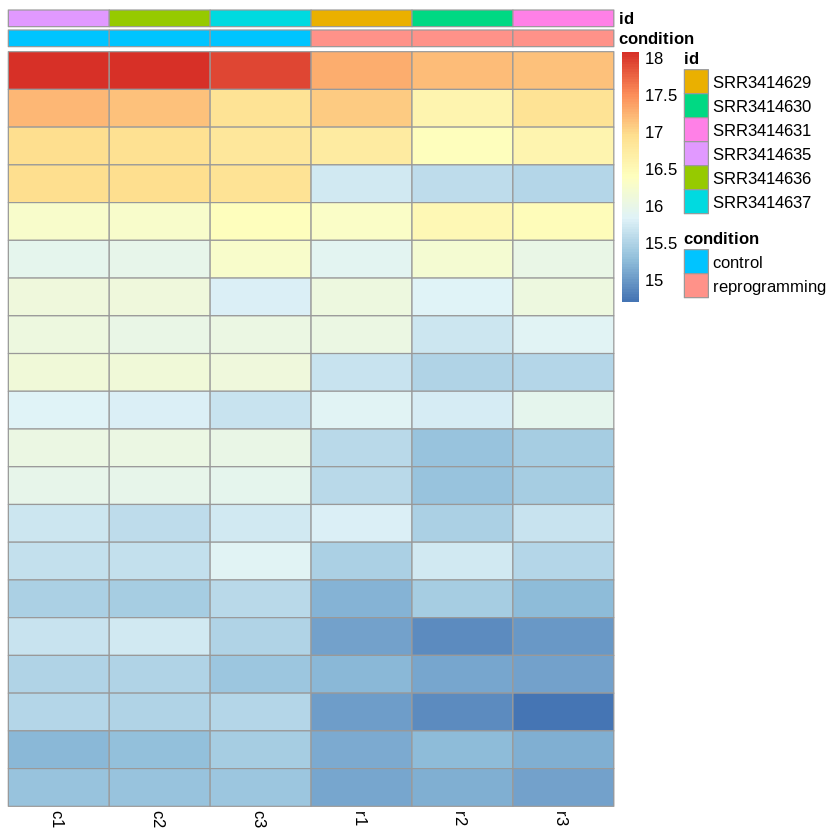

In [16]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)


log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000903.3    4.5948        2.57262   1.08932   2.36167 0.0181929
                          padj
                     <numeric>
ENSMUSG00000000903.3 0.0460485

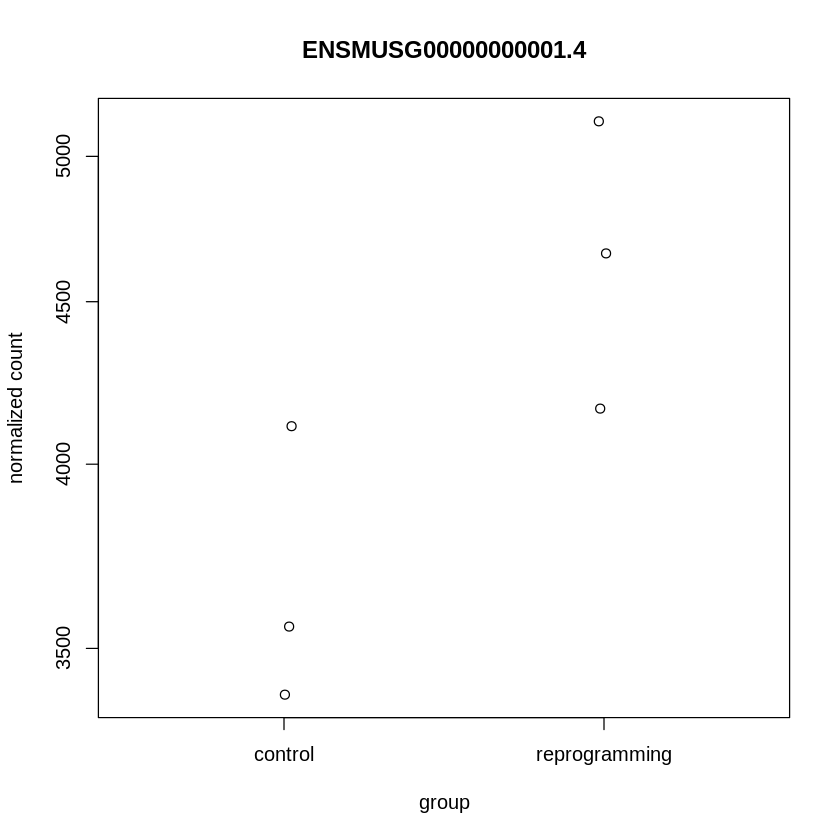

In [17]:
res[156,]
plotCounts(dds, gene=1, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000118659.1         0             NA        NA        NA        NA
                          padj
                     <numeric>
ENSMUSG00000118659.1        NA

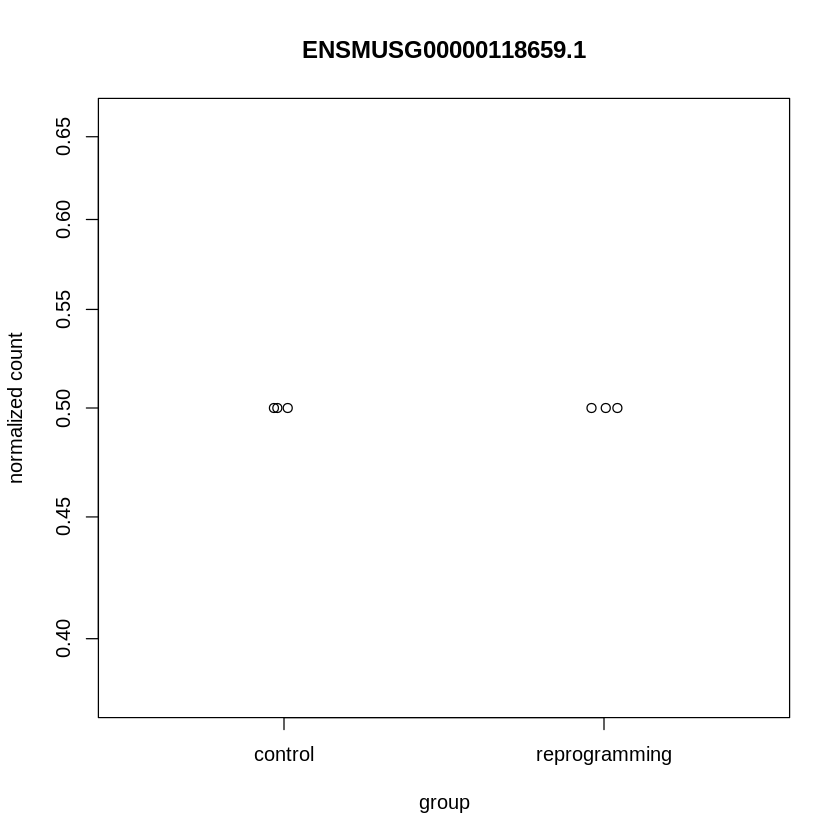

In [18]:
res[55401,]
plotCounts(dds, gene=55401, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000098678.1   271.528        5.95347  0.318473   18.6938 5.55885e-78
                            padj
                       <numeric>
ENSMUSG00000098678.1 8.27708e-76

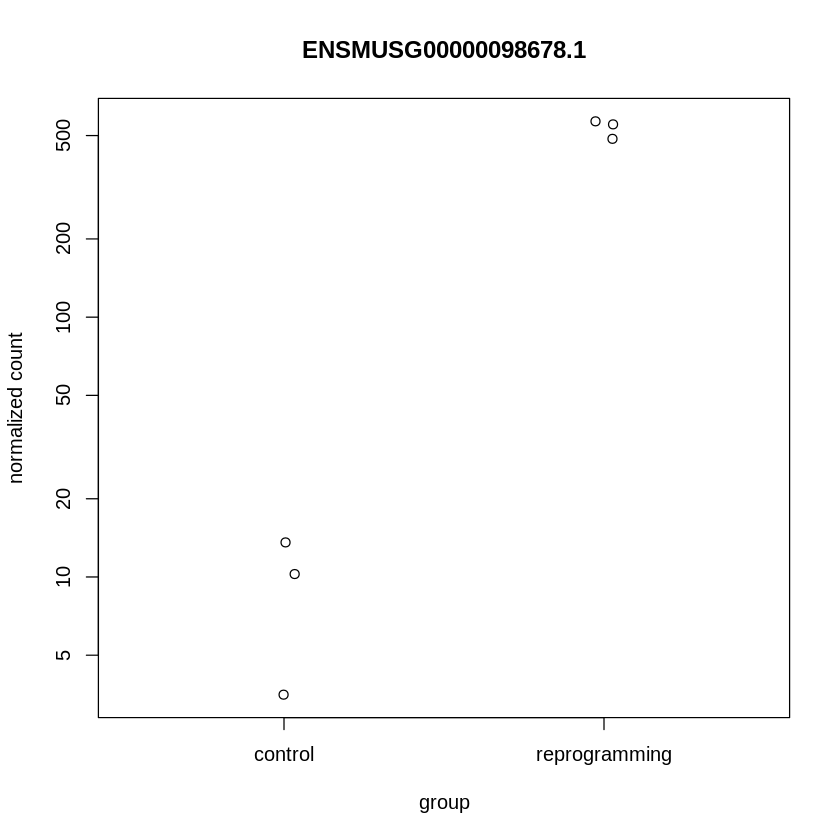

In [69]:
res[36735,]
plotCounts(dds, gene=36735, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000040728.15   422.308        12.1686   1.18742    10.248 1.20858e-24
                             padj
                        <numeric>
ENSMUSG00000040728.15 3.11507e-23

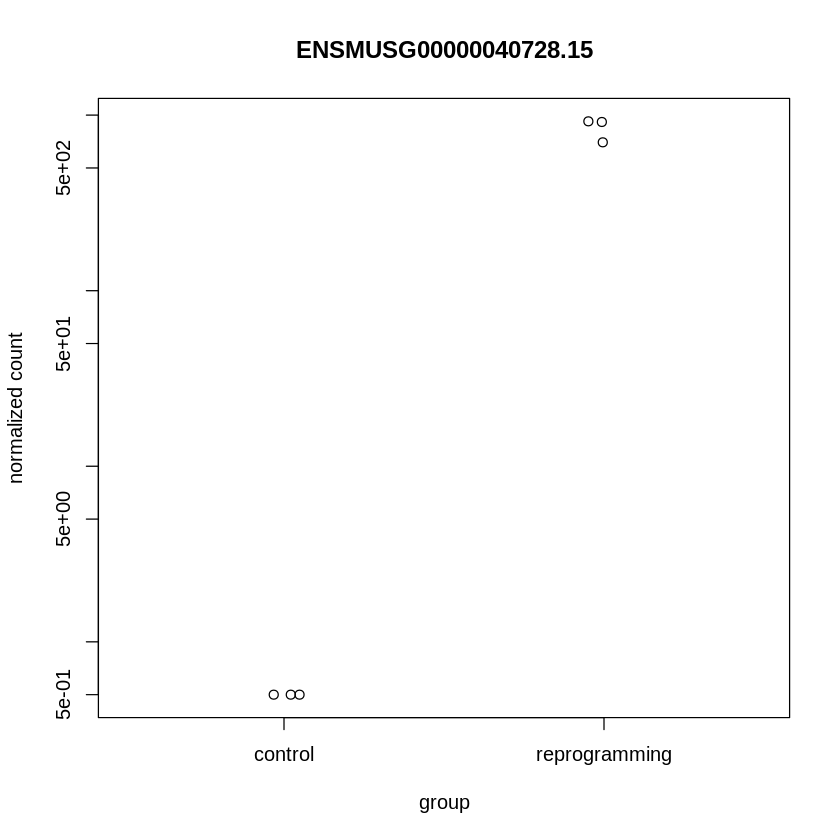

In [81]:
res[12032,]
plotCounts(dds, gene=12032, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000048992.9   290.481        11.6316   1.18847   9.78708 1.27937e-22
                            padj
                       <numeric>
ENSMUSG00000048992.9 2.94869e-21

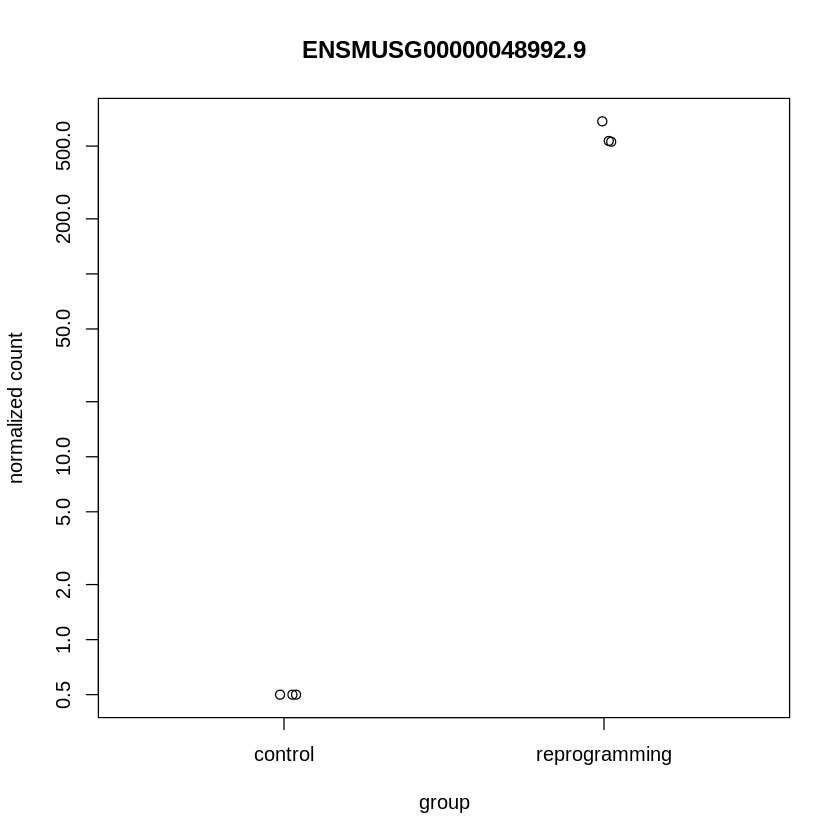

In [84]:
res[14407,]
plotCounts(dds, gene=14407, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000039269.5   401.965        12.0995   1.18458   10.2142 1.71331e-24
                            padj
                       <numeric>
ENSMUSG00000039269.5 4.37243e-23

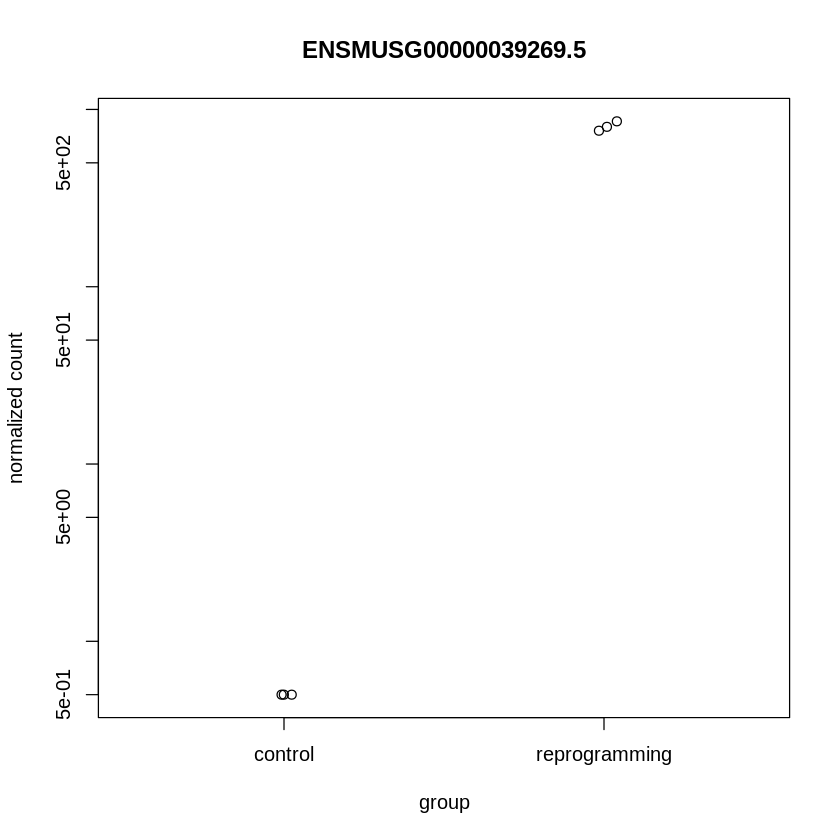

In [85]:
res[11481,]
plotCounts(dds, gene=11481, intgroup="condition")

Choosing a number of graphs for genes that changed their expression the most

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000058354.7   625.053        12.7345   1.18325   10.7623 5.18863e-27
                            padj
                       <numeric>
ENSMUSG00000058354.7 1.49775e-25

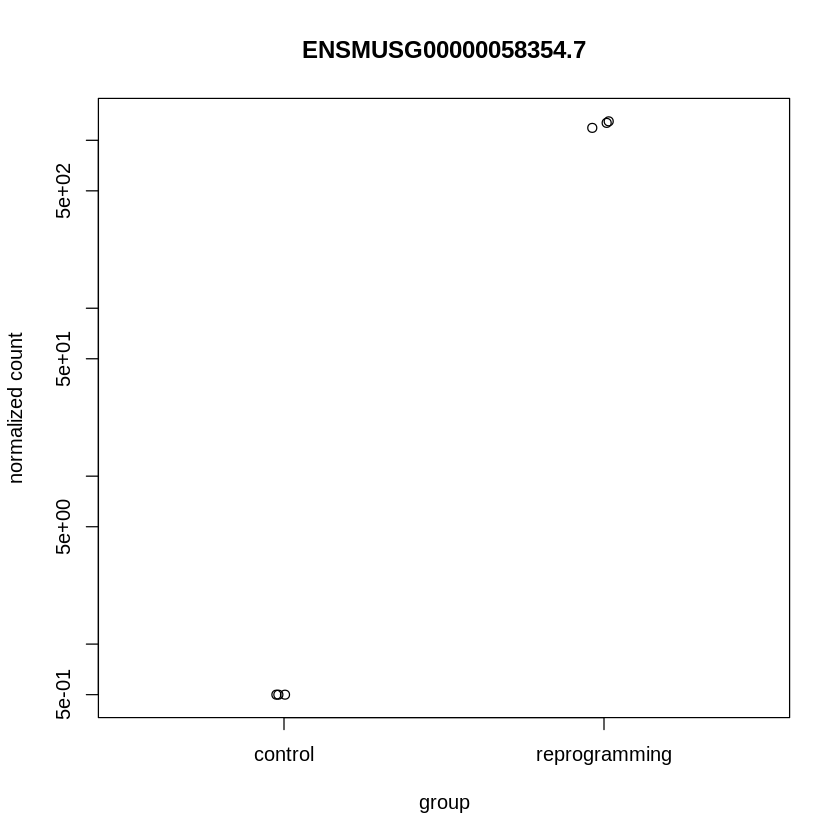

In [86]:
res[16564,]
plotCounts(dds, gene=16564, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000037335.13   108.692        10.2157   1.21286    8.4228 3.67605e-17
                             padj
                        <numeric>
ENSMUSG00000037335.13 5.79903e-16

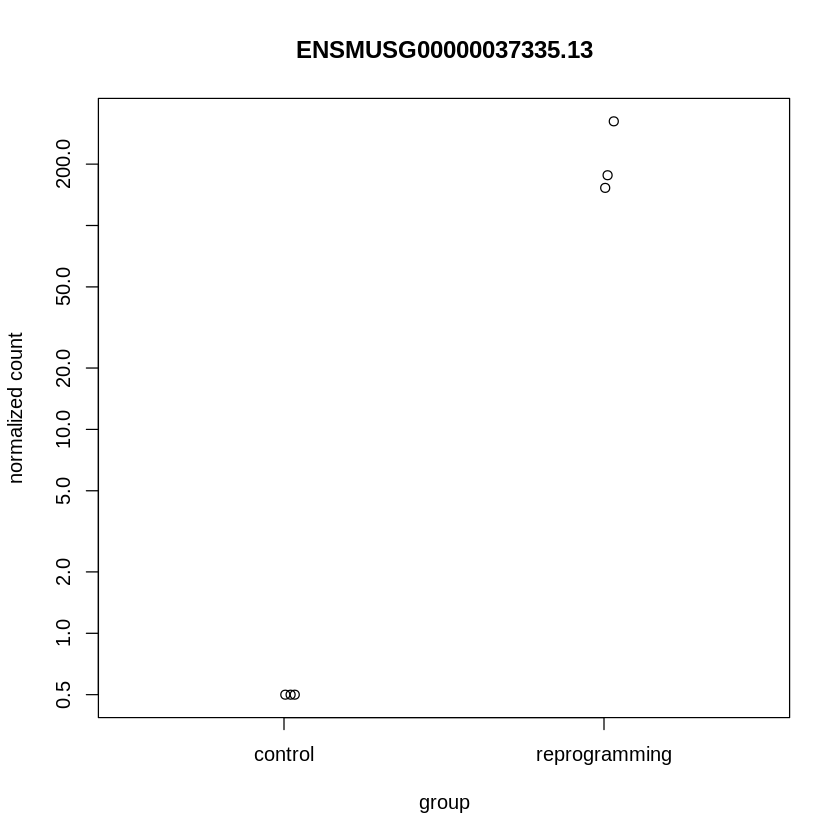

In [79]:
res[10671,]
plotCounts(dds, gene=10671, intgroup="condition")

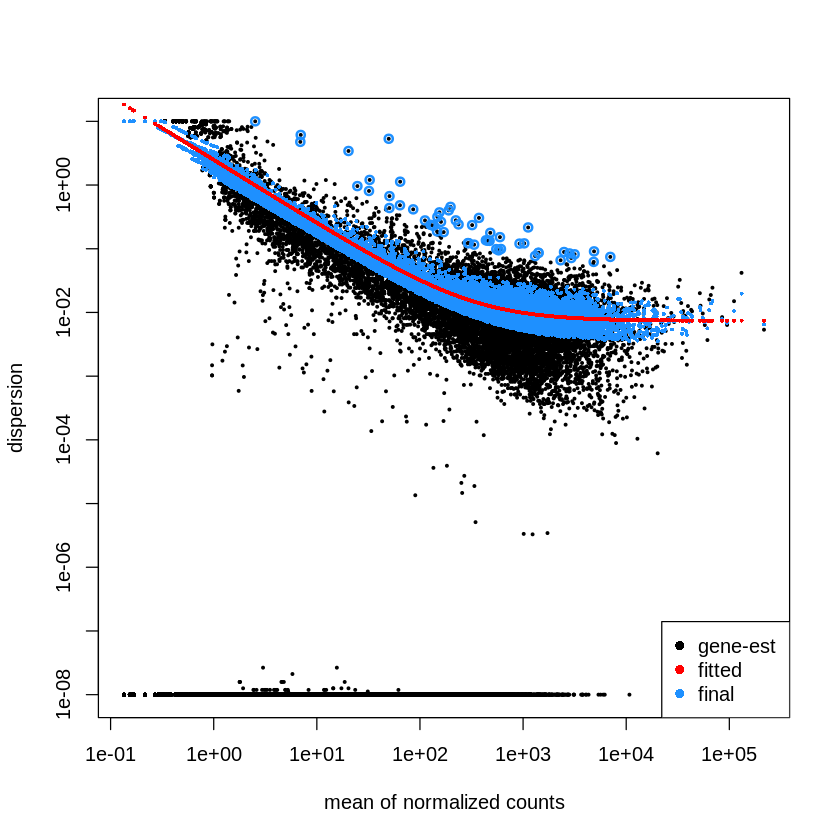

In [29]:
plotDispEsts(dds)


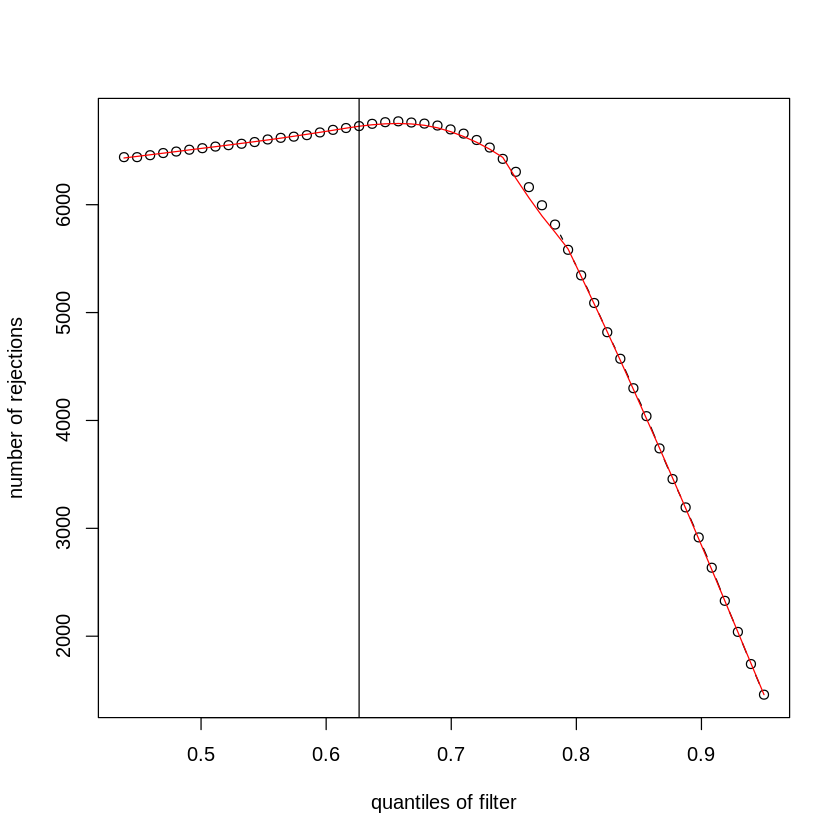

In [30]:
plot(metadata(res)$filterNumRej,
     type="b", ylab="number of rejections",
     xlab="quantiles of filter")
lines(metadata(res)$lo.fit, col="red")
abline(v=metadata(res)$filterTheta)